In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
# Load the training data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# Basic info
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Preview the data
train_df.head()

Train shape: (2029, 9)
Test shape: (10, 8)


,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation
0,0,Banks don't want you to know this! Click here ...,"No Advertising: Spam, referral links, unsolici...",Futurology,If you could tell your younger self something ...,hunt for lady for jack off in neighbourhood ht...,Watch Golden Globe Awards 2017 Live Online in ...,"DOUBLE CEE x BANDS EPPS - ""BIRDS""\n\nDOWNLOAD/...",0
1,1,SD Stream [ ENG Link 1] (http://www.sportsstre...,"No Advertising: Spam, referral links, unsolici...",soccerstreams,[I wanna kiss you all over! Stunning!](http://...,LOLGA.COM is One of the First Professional Onl...,#Rapper \n🚨Straight Outta Cross Keys SC 🚨YouTu...,[15 Amazing Hidden Features Of Google Search Y...,0
2,2,Lol. Try appealing the ban and say you won't d...,No legal advice: Do not offer or request legal...,pcmasterrace,Don't break up with him or call the cops. If ...,It'll be dismissed: https://en.wikipedia.org/w...,Where is there a site that still works where y...,Because this statement of his is true. It isn'...,1
3,3,she will come your home open her legs with an...,"No Advertising: Spam, referral links, unsolici...",sex,Selling Tyrande codes for 3€ to paypal. PM. \n...,tight pussy watch for your cock get her at thi...,NSFW(obviously) http://spankbang.com/iy3u/vide...,Good News ::Download WhatsApp 2.16.230 APK for...,1
4,4,code free tyrande --->>> [Imgur](http://i.imgu...,"No Advertising: Spam, referral links, unsolici...",hearthstone,wow!! amazing reminds me of the old days.Well...,seek for lady for sex in around http://p77.pl/...,must be watch movie https://sites.google.com/s...,We're streaming Pokemon Veitnamese Crystal RIG...,1


In [3]:
train_df['rule_violation'].value_counts(normalize=True)

rule_violation
1    0.508132
0    0.491868
Name: proportion, dtype: float64

In [4]:
print("Unique training rules:", train_df['rule'].nunique())
print("Unique test rules:", test_df['rule'].nunique())

Unique training rules: 2
Unique test rules: 2


In [5]:
train_rules = set(train_df['rule'].unique())
test_rules = set(test_df['rule'].unique())

print("Unseen test rules:", len(test_rules - train_rules))

Unseen test rules: 0


In [6]:
train_df['body_len'] = train_df['body'].apply(lambda x: len(str(x).split()))
train_df['body_len'].describe()

count    2029.000000
mean       27.963036
std        21.230214
min         1.000000
25%        11.000000
50%        22.000000
75%        39.000000
max        97.000000
Name: body_len, dtype: float64

<Axes: title={'center': 'Violation rate per rule'}, ylabel='rule'>

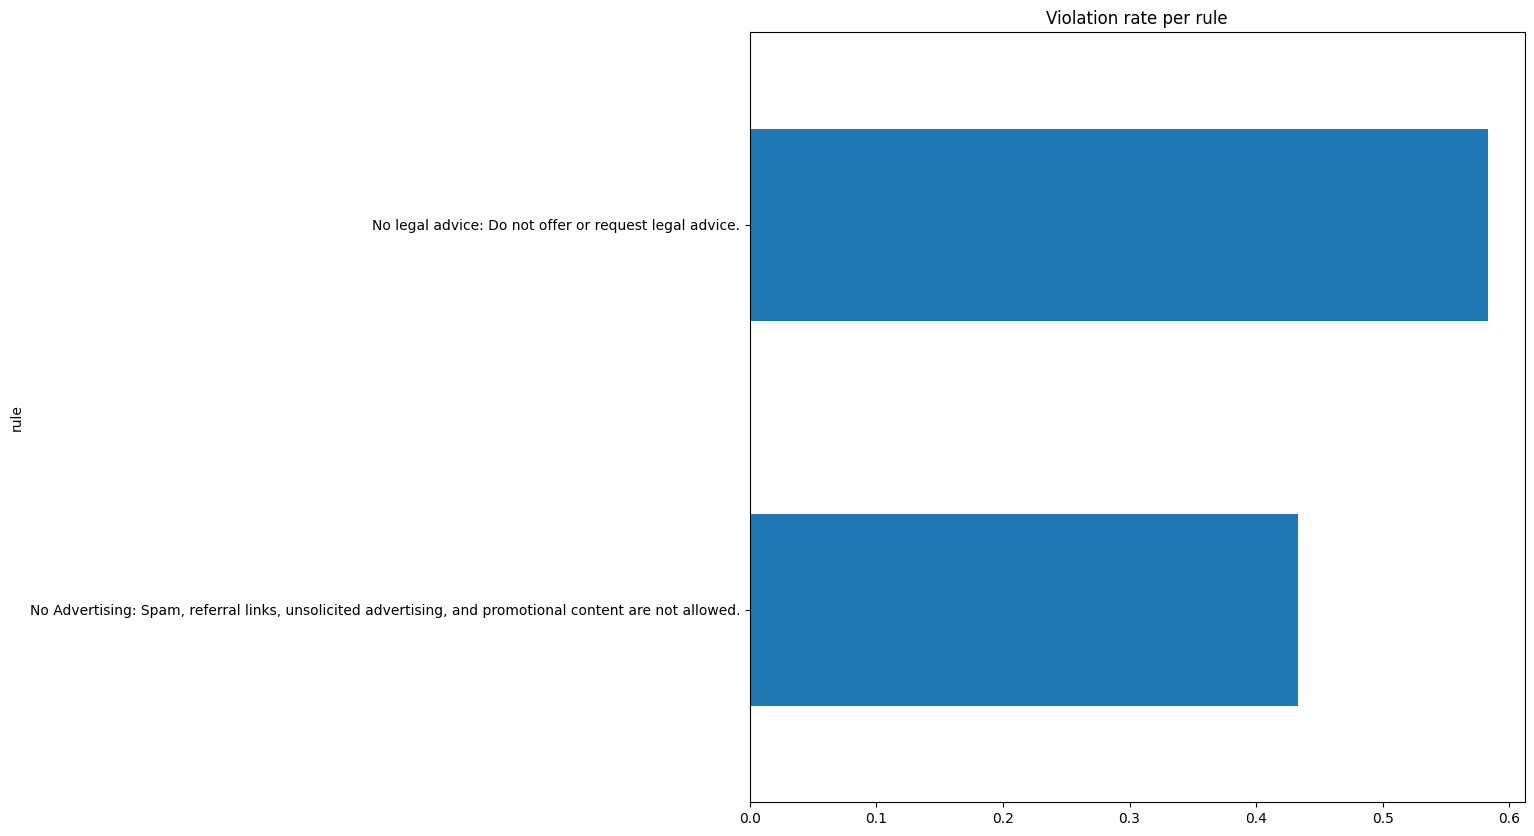

In [7]:
rule_violation_by_rule = train_df.groupby('rule')['rule_violation'].mean().sort_values()
rule_violation_by_rule.plot(kind='barh', figsize=(10, 10), title='Violation rate per rule')

In [8]:
train_df.head()

,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation,body_len
0,0,Banks don't want you to know this! Click here ...,"No Advertising: Spam, referral links, unsolici...",Futurology,If you could tell your younger self something ...,hunt for lady for jack off in neighbourhood ht...,Watch Golden Globe Awards 2017 Live Online in ...,"DOUBLE CEE x BANDS EPPS - ""BIRDS""\n\nDOWNLOAD/...",0,12
1,1,SD Stream [ ENG Link 1] (http://www.sportsstre...,"No Advertising: Spam, referral links, unsolici...",soccerstreams,[I wanna kiss you all over! Stunning!](http://...,LOLGA.COM is One of the First Professional Onl...,#Rapper \n🚨Straight Outta Cross Keys SC 🚨YouTu...,[15 Amazing Hidden Features Of Google Search Y...,0,7
2,2,Lol. Try appealing the ban and say you won't d...,No legal advice: Do not offer or request legal...,pcmasterrace,Don't break up with him or call the cops. If ...,It'll be dismissed: https://en.wikipedia.org/w...,Where is there a site that still works where y...,Because this statement of his is true. It isn'...,1,12
3,3,she will come your home open her legs with an...,"No Advertising: Spam, referral links, unsolici...",sex,Selling Tyrande codes for 3€ to paypal. PM. \n...,tight pussy watch for your cock get her at thi...,NSFW(obviously) http://spankbang.com/iy3u/vide...,Good News ::Download WhatsApp 2.16.230 APK for...,1,12
4,4,code free tyrande --->>> [Imgur](http://i.imgu...,"No Advertising: Spam, referral links, unsolici...",hearthstone,wow!! amazing reminds me of the old days.Well...,seek for lady for sex in around http://p77.pl/...,must be watch movie https://sites.google.com/s...,We're streaming Pokemon Veitnamese Crystal RIG...,1,23


In [9]:
train_df.describe()


,row_id,rule_violation,body_len
count,2029.000000,2029.000000,2029.000000
mean,1014.000000,0.508132,27.963036
std,585.866168,0.500057,21.230214
min,0.000000,0.000000,1.000000
25%,507.000000,0.000000,11.000000
50%,1014.000000,1.000000,22.000000
75%,1521.000000,1.000000,39.000000
max,2028.000000,1.000000,97.000000


In [10]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import nltk

# Tải lexicon nếu chưa có
nltk.download("punkt_tab")
nltk.download('opinion_lexicon')
nltk.download('punkt')

# Giả sử df có cột 'body' (bình luận) và 'created_utc' (timestamp)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/dinhtanloc/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/dinhtanloc/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.
[nltk_data] Downloading package punkt to /home/dinhtanloc/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
train_df['Length_char'] = train_df['body'].str.len()   # số ký tự
train_df['Length_word'] = train_df['body'].str.split().str.len()   # số từ


In [12]:
negative_words = set(opinion_lexicon.negative())

def count_neg_words(text):
    words = word_tokenize(text.lower())
    return sum(1 for w in words if w in negative_words)

train_df['NegWords'] = train_df['body'].apply(count_neg_words)


In [13]:
def uppercase_ratio(text):
    if len(text) == 0:
        return 0
    num_upper = sum(1 for c in text if c.isupper())
    return num_upper / len(text)

train_df['UpperCaseRatio'] = train_df['body'].apply(uppercase_ratio)


In [14]:
train_df['ContainsLink'] = train_df['body'].str.contains(r'http[s]?://|www\.', regex=True).astype(int)


In [15]:
from transformers import pipeline
import os
# os.environ["TRANSFORMERS_OFFLINE"] = "1"

sentiment_model = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [16]:
def get_sentiment_score(text):
    result = sentiment_model(text)[0]
    label = result['label']   # LABEL_0 (negative), LABEL_1 (neutral), LABEL_2 (positive)
    score = result['score']   # confidence
    if label == "NEGATIVE":
        return -score
    elif label == "POSITIVE":
        return score
    else:
        return 0
train_df['SentimentScore'] = train_df['body'].apply(get_sentiment_score)


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Khởi tạo VADER
analyzer = SentimentIntensityAnalyzer()

def add_vader_scores(df, text_col):
    """
    Thêm 3 cột sentiment score (neg, neu, pos) từ VADER vào DataFrame.
    
    df       : pandas DataFrame
    text_col : tên cột chứa văn bản (str)
    """
    df = df.copy()  # tránh thay đổi DataFrame gốc
    
    df["negScore"] = df[text_col].apply(lambda x: analyzer.polarity_scores(str(x))["neg"])
    df["neuScore"] = df[text_col].apply(lambda x: analyzer.polarity_scores(str(x))["neu"])
    df["posScore"] = df[text_col].apply(lambda x: analyzer.polarity_scores(str(x))["pos"])

    return df


In [18]:
train_df = add_vader_scores(train_df, 'body')

In [19]:
train_df.head()

,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation,body_len,Length_char,Length_word,NegWords,UpperCaseRatio,ContainsLink,SentimentScore,negScore,neuScore,posScore
0,0,Banks don't want you to know this! Click here ...,"No Advertising: Spam, referral links, unsolici...",Futurology,If you could tell your younger self something ...,hunt for lady for jack off in neighbourhood ht...,Watch Golden Globe Awards 2017 Live Online in ...,"DOUBLE CEE x BANDS EPPS - ""BIRDS""\n\nDOWNLOAD/...",0,12,59,12,0,0.033898,0,-0.999523,0.141,0.859,0.000
1,1,SD Stream [ ENG Link 1] (http://www.sportsstre...,"No Advertising: Spam, referral links, unsolici...",soccerstreams,[I wanna kiss you all over! Stunning!](http://...,LOLGA.COM is One of the First Professional Onl...,#Rapper \n🚨Straight Outta Cross Keys SC 🚨YouTu...,[15 Amazing Hidden Features Of Google Search Y...,0,7,91,7,0,0.076923,1,-0.972538,0.000,1.000,0.000
2,2,Lol. Try appealing the ban and say you won't d...,No legal advice: Do not offer or request legal...,pcmasterrace,Don't break up with him or call the cops. If ...,It'll be dismissed: https://en.wikipedia.org/w...,Where is there a site that still works where y...,Because this statement of his is true. It isn'...,1,12,57,12,0,0.035088,0,-0.997785,0.220,0.610,0.171
3,3,she will come your home open her legs with an...,"No Advertising: Spam, referral links, unsolici...",sex,Selling Tyrande codes for 3€ to paypal. PM. \n...,tight pussy watch for your cock get her at thi...,NSFW(obviously) http://spankbang.com/iy3u/vide...,Good News ::Download WhatsApp 2.16.230 APK for...,1,12,75,12,0,0.053333,1,0.997307,0.000,1.000,0.000
4,4,code free tyrande --->>> [Imgur](http://i.imgu...,"No Advertising: Spam, referral links, unsolici...",hearthstone,wow!! amazing reminds me of the old days.Well...,seek for lady for sex in around http://p77.pl/...,must be watch movie https://sites.google.com/s...,We're streaming Pokemon Veitnamese Crystal RIG...,1,23,313,23,0,0.067093,1,-0.997632,0.000,0.754,0.246


In [21]:
train_df = train_df.drop(columns=['row_id'])
train_df.to_csv('data/train_enhanced.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine body + rule text as input
train_df['text'] = train_df['body'] + " [SEP] " + train_df['rule']

# Train/validation split
X_train, X_val, y_train, y_val = train_test_split(train_df['text'], train_df['rule_violation'], test_size=0.2, random_state=42)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=100000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
val_preds = lr.predict_proba(X_val_tfidf)[:, 1]
print("Logistic Regression AUC:", roc_auc_score(y_val, val_preds))

In [ ]:
# from sklearn.linear_model import Ridge
# from sklearn.metrics import roc_auc_score

# ridge = Ridge(alpha=1.0)
# ridge.fit(X_train_tfidf, y_train)
# val_preds_ridge = ridge.predict(X_val_tfidf)

# print("Ridge Regression AUC:", roc_auc_score(y_val, val_preds_ridge))

In [ ]:
import lightgbm as lgb

# Define datasets
lgb_train = lgb.Dataset(X_train_tfidf, label=y_train)
lgb_val = lgb.Dataset(X_val_tfidf, label=y_val)

# Params
params = {
    'objective': 'binary',
    'metric': 'auc',
    'verbosity': -1,
    'boosting_type': 'gbdt'
}

# Use callbacks for early stopping
callbacks = [lgb.early_stopping(stopping_rounds=10)]

# Train
lgb_model = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_val],
    valid_names=["val"],
    callbacks=callbacks
)

In [ ]:
val_preds_lgb = lgb_model.predict(X_val_tfidf, num_iteration=lgb_model.best_iteration)
from sklearn.metrics import roc_auc_score
print("LightGBM AUC:", roc_auc_score(y_val, val_preds_lgb))

In [ ]:
# Combine body and rule just like training
test_df['input'] = test_df['body'] + ' [SEP] ' + test_df['rule']
X_test_tfidf = vectorizer.transform(test_df['input'])

# Predict
test_preds = lgb_model.predict(X_test_tfidf, num_iteration=lgb_model.best_iteration)

# Prepare submission
submission = pd.DataFrame({
    'row_id': test_df['row_id'],
    'rule_violation': test_preds
})

submission.to_csv('submission.csv', index=False)